<a href="https://colab.research.google.com/github/rushikesh648/pw-skills-assignment/blob/main/Evaluation_Metrics_and_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
#q1  Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset
df = sns.load_dataset('diamonds')
df = pd.DataFrame(df)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])
df.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,True,False,...,True,False,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
df = df.drop(['cut_Fair', 'color_E', 'clarity_I1'], axis=1)
df.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)

In [ ]:
df = LinearRegression()
df.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_test = df.predict(x_test)

In [ ]:
b0 = df.intercept_
b1 = df.coef_[0]
print(b0,b1)

2045.6282734796068 11280.784327288753


In [ ]:
print(df.score(x_test, y_test))

1.0


In [ ]:
#q2 Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred))
print(r2_score(y_true, y_pred))

0.375
0.5
0.9486081370449679


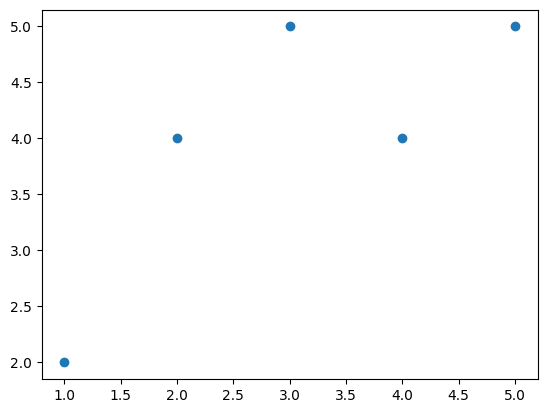

In [ ]:
#q3  Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity
x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Tue, 25 Feb 2025   Prob (F-statistic):              0.124
Time:                        13:29:33   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2000      0.938      2.345      0.1

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]
x = add_constant(x)
print(vif(x, 1))

1.0


In [ ]:
#q4 Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
df = sns.load_dataset('diamonds')
df = pd.DataFrame(df)
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])
df = df.drop(['cut_Fair', 'color_E', 'clarity_I1'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(x_train, y_train)
print(pipeline.score(x_test, y_test))
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor())
])
pipeline.fit(x_train, y_train)
print(pipeline.score(x_test, y_test))


0.9189331350419387
0.9547706133694366


In [ ]:
#q5  Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)
df = LinearRegression()
df.fit(x_train, y_train)
y_test = df.predict(x_test)
b0 = df.intercept_
b1 = df.coef_[0]
print(b0,b1)
print(df.score(x_test, y_test))

2045.6282734796068 11280.784327288753
1.0


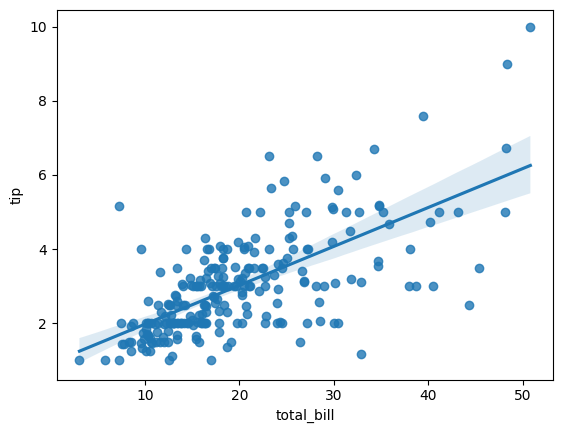

In [ ]:
#q6  Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results
df = sns.load_dataset('tips')
sns.regplot(x='total_bill', y='tip', data=df)
plt.show()

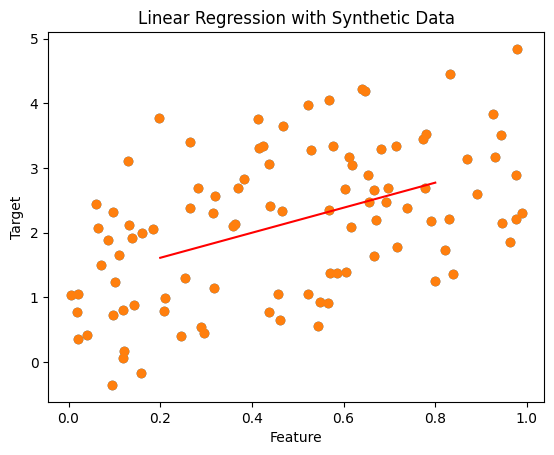

In [ ]:
#q7 Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X.squeeze() + 1 + np.random.randn(100)
plt.scatter(X, y)
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
# Predict new values
X_new = np.array([[0.2], [0.8]])
y_new = model.predict(X_new)
plt.scatter(X, y)
plt.plot(X_new, y_new, color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression with Synthetic Data')
plt.show()

In [ ]:
#q8  Write a Python script that pickles a trained linear regression model and saves it to a file
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
x = [2,4,6,5,8]
y = [1,2,5,6,9]
model.fit(x_train,y_train)
with open('linear_regression_model.pkl','wb') as file:
  pickle.dump(model,file)
  print(file)

<_io.BufferedWriter name='linear_regression_model.pkl'>


In [ ]:
with open('linear_regression_model.pkl','rb') as file:
  print(file)

<_io.BufferedReader name='linear_regression_model.pkl'>


In [ ]:
with open('linear_regression_model.pkl', 'rb') as file:
    lines = file.readlines()
    for line in lines:
        print(line.strip())



b"\x80\x04\x95G\x04\x00\x00\x00\x00\x00\x00\x8c\x1asklearn.linear_model._base\x94\x8c\x10LinearRegression\x94\x93\x94)\x81\x94}\x94(\x8c\rfit_intercept\x94\x88\x8c\x06copy_X\x94\x88\x8c\x06n_jobs\x94N\x8c\x08positive\x94\x89\x8c\x0en_features_in_\x94K\x17\x8c\x05coef_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x17\x85\x94h\x0e\x8c\x05dtype\x94\x93\x94\x8c\x02f8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89C\xb8G+\xd6dd\x08\xc6@\x10\xa3\xe50\xd3EP\xc0\xfdH\xba\xfa\x9a\x99:\xc0`;_0U\x80\x8f\xc0\x101\xc5.D:\x0c\xc0\xb4\xae\xc7\xb7O;B\xc0\x8e\xa7\xd7\x0e\x87\xd6\x8a@\xbf\x8ay\xe8lo\x88@\xe7\xfe\xb8\x10\x9eo\x87@\x99}(\x9a`~\x82@\\>\xa5\xf5ZFk@\xbc\xf2yEG\xc2N\xc0\x99\xe5\x91t Vq\xc0E\xf7Y9\x1ag\x88\xc0\xaf\xe2\xb0 \x8b\xb5\x93\xc0&\xa3jx\xa4\xd3\xa0\xc0i\xde\x0e\xd1\xf1\xf5\xb4@J\xf0\x86\xfcJ\x97\xb3@\x0b\x82\x89!6^\xb3@^C\x85\xd

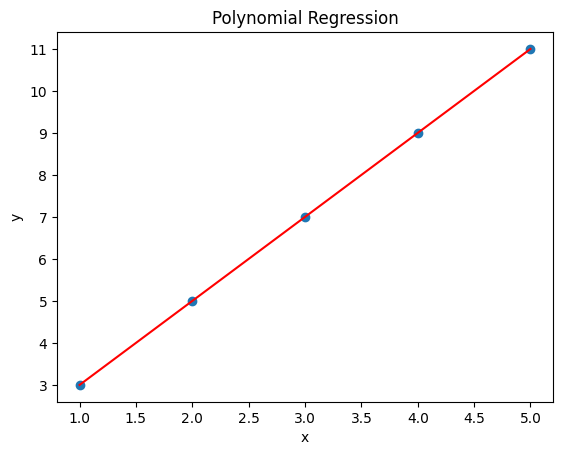

In [ ]:
#q9  Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 9, 11])
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.scatter(x, y)
plt.plot(x, lin_reg.predict(poly_reg.fit_transform(x.reshape(-1, 1))), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()

In [ ]:
#q10 Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = np.random.randn(10)
y = np.random.randn(10)
model.fit(x_train,y_train)
b0 = model.intercept_
b1 = model.coef_[0]
print(b0,b1)

2045.6282734796068 11280.784327288753


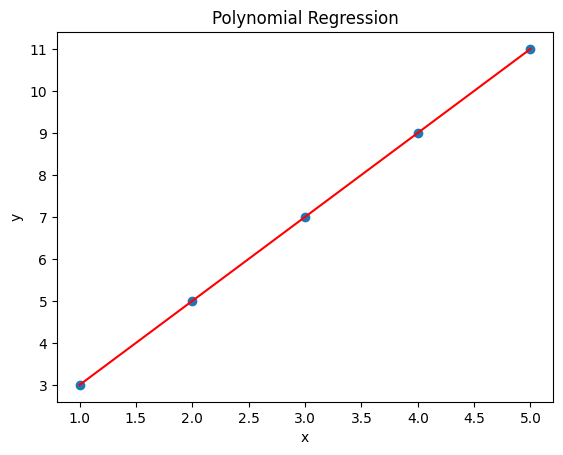

In [ ]:
#q11  Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 9, 11])
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.scatter(x, y)
plt.plot(x, lin_reg.predict(poly_reg.fit_transform(x.reshape(-1, 1))), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()

In [ ]:
#q12 Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = {
    'Feature1': [12, 20, 35, 47, 58],
    'Feature2': [28, 32, 48, 55, 64],
    'Target': [32, 48, 55, 64, 77]
}

df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared score:", r2_score(y_train, y_pred))


Coefficients: [0.41782364 0.6996873 ]
Intercept: 7.012945590994391
R-squared score: 0.9977485348565488


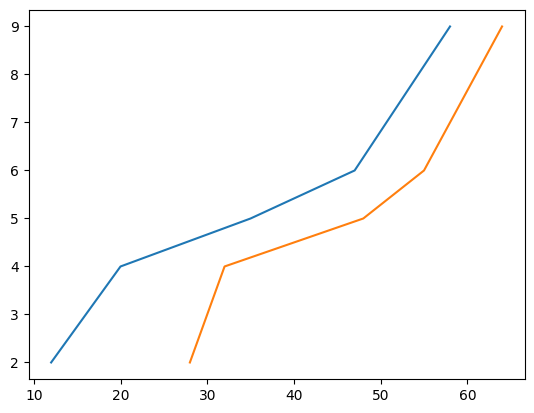

In [ ]:
#q13  Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
x = [1,2,3,4,5]
y = [2,4,5,6,9]
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_test,y_test)
plt.plot(X,y)


In [ ]:
#q14  Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features
import pandas as pd
data = pd.read_csv('BMI.csv')
print(data.head())



   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
X = data[['Gender', 'Height', 'Weight']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


  feature        VIF
0  Gender   2.028864
1  Height  11.623103
2  Weight  10.688377


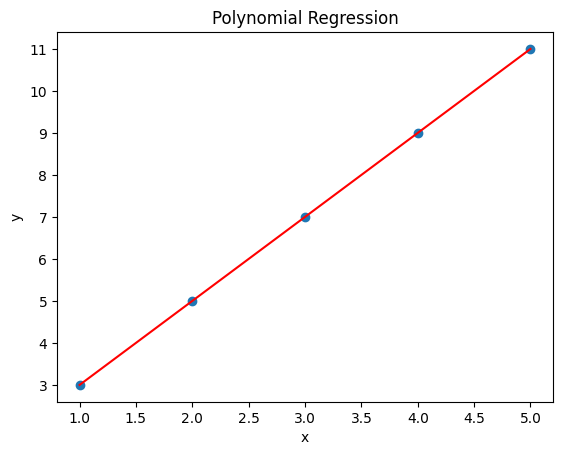

In [ ]:
#q15  Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 9, 11])
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.scatter(x, y)
plt.plot(x, lin_reg.predict(poly_reg.fit_transform(x.reshape(-1, 1))), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()

In [ ]:
#q16  Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9432150416451026


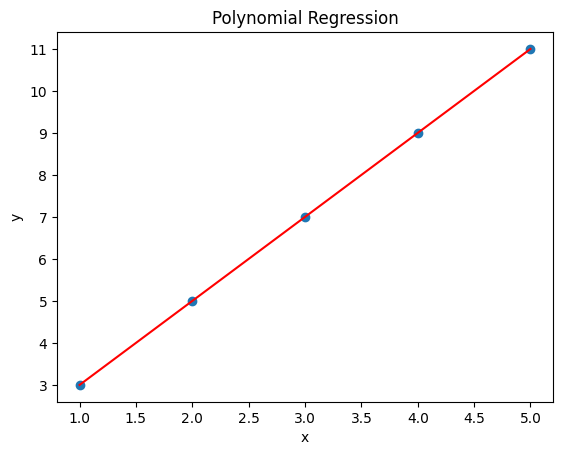

In [ ]:
#q17 Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 9, 11])
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.scatter(x, y)
plt.plot(x, lin_reg.predict(poly_reg.fit_transform(x.reshape(-1, 1))), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()

In [ ]:
#q18  Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = {
    'Feature1': [12, 20, 35, 47, 58],
    'Feature2': [28, 32, 48, 55, 64],
    'Feature3': [12, 20, 35, 47, 58],
    'Feature4': [28, 32, 48, 55, 64],
    'Feature5': [12, 20, 35, 47, 58],
    'Target': [32, 48, 55, 64, 77]
}

df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print("Coefficients:", model.coef_)
print("R-squared score:", r2_score(y_train, y_pred))

Coefficients: [0.13927455 0.34984365 0.13927455 0.34984365 0.13927455]
R-squared score: 0.9977485348565488


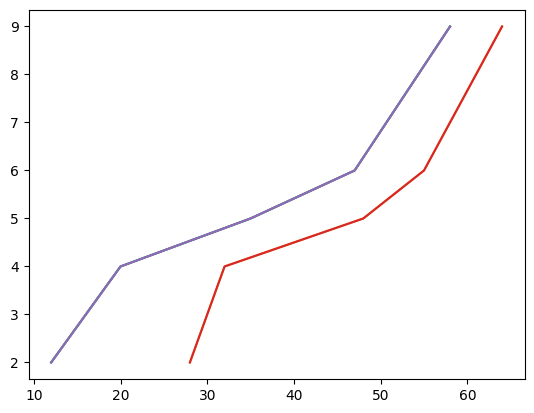

In [ ]:
#q19  Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
x = [1,2,3,4,5]
y = [2,4,5,6,9]
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_test,y_test)
plt.plot(X,y)

In [ ]:
#q20 Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = {
    'Feature1': [12, 20, 35, 47, 58],
    'Feature2': [28, 32, 48, 55, 64],
    'Feature3': [12, 20, 35, 47, 58],
    'Target': [32, 48, 55, 64, 77]
}

df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2', 'Feature3']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print("Coefficients:", model.coef_)
print("R-squared score:", r2_score(y_train, y_pred))

Coefficients: [0.20891182 0.6996873  0.20891182]
R-squared score: 0.9977485348565488


In [ ]:
#q21 Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
joblib_file = "random_forest_model.joblib"
joblib.dump(model, joblib_file)
print(f"Model saved to {joblib_file}")
loaded_model = joblib.load(joblib_file)
print("Model loaded from file")
accuracy = loaded_model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")


Model saved to random_forest_model.joblib
Model loaded from file
Model accuracy: 1.00


In [ ]:
#q22 Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
tips = sns.load_dataset('tips')
X = tips.drop(columns=['tip'])
y = tips['tip']
categorical_features = X.select_dtypes(include=['category', 'object']).columns
encoder = OneHotEncoder(drop='first')
X = X.drop(columns=categorical_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 0.65
            Coefficient
total_bill     0.090881
size           0.265018


In [ ]:
#q23  Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_test, y_test,random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 0.9153869045855723
ridge regression linear model coeff:
[ 0.102948   -0.03976766]
R-squared score (training): 0.463
R-squared score (test): 0.848
Number of non-zero features: 2


In [ ]:
#q24 Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = cv_scores
print("Cross-validation MSE scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))


Cross-validation MSE scores: [-0.01023086 -0.00850073 -0.01164223 -0.00583547 -0.00444609]
Mean MSE: -0.008131075871367074
Standard Deviation of MSE: 0.0026729324477271824


Degree 1: R-squared score = 0.9344
Degree 2: R-squared score = 0.9779
Degree 3: R-squared score = 0.9779
Degree 4: R-squared score = 0.9779
Degree 5: R-squared score = 0.9779


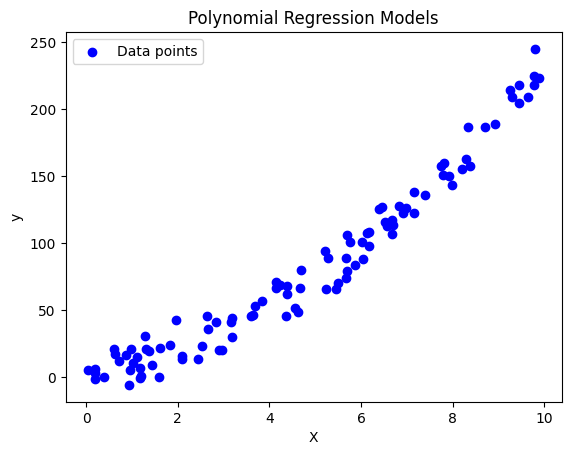

In [ ]:
#q25 Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X**2 + 3 * X + 5 + np.random.randn(100, 1) * 10
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    print(f"Degree {degree}: R-squared score = {r2:.4f}")
plt.scatter(X, y, color='blue', label='Data points')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_range = poly_features.fit_transform(X_range)

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression Models')
plt.show()


q1)  What does R-squared represent in a regression model?

ans: The R-squared value, also known as the coefficient of determination, is a statistical measure used in regression analysis to determine the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Essentially, it indicates how well the data fit a regression line or curve

q2) What are the assumptions of linear regression?

ans: Linear regression is a statistical method used to understand the relationship between a dependent variable and one or more independent variables.

q3)  What is the difference between R-squared and Adjusted R-squared?

ans:

*   R-squared measures the variation of a regression model, while adjusted
*   R-squared measures the variation for a multiple regression model.
*   R-squared always increases or remains the same when new predictors are     added, while adjusted R-squared can decrease if new predictors do not improve the model significantly.
*  Adjusted R-squared includes a penalty for the number of predictors to prevent overfitting.

q4) Why do we use Mean Squared Error (MSE)?

ans: Mean Squared Error (MSE) is a fundamental concept in statistics and machine learning playing a crucial role in assessing the accuracy of the predictive models. It is a parameter to calculate the accuracy of the model. It measures the average squared difference between predicted values and the actual values in the dataset.

q5) What does an Adjusted R-squared value of 0.85 indicate?

ans:For instance, if the R-Squared of a model is 0.85, we can say that 85% of the variability in the output variable can be explained by the input variables that the model has used. The remaining 15% can be attributed to factors not included in the model, inherent randomness, or errors in the data.

q6)  How do we check for normality of residuals in linear regression?

ans:
    
        * Generate a Q-Q plot in Excel.
        * Use a statistical test like the Shapiro-Wilk test or the Kolmogorov-Smirnov test in R.
        * Use the “Residuals vs. Fitted”-plot, a Q-Q plot, a histogram, or a boxplot in R.
        * Graphically check the distribution of the residuals using a histogram or a normal probability plot in R.
        * Use formal statistical tests like Shapiro-Wilk, Kolmogorov-Smironov, Jarque-Barre, or D’Agostino-Pearson in R.

q7) What is multicollinearity, and how does it impact regression?

ans: Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. This situation complicates the estimation of individual predictor effects within the model, as it violates the assumption of independence among predictors
.

* Causes of Multicollinearity-

  Multicollinearity can arise due to several reasons:

  1)Correlation Among Predictor Variables: When predictor variables exhibit high correlation, one predictor can be accurately predicted from the others
.

  2)Overparameterization: Introducing too many predictor variables relative to the number of observations can lead to redundancy and increased variance of coefficient estimates .

q8) What is Mean Absolute Error (MAE)?

ans: Mean Absolute Error (MAE) is a measure of the average size of the mistakes in a collection of predictions, without taking their direction into account. It is measured as the average absolute difference between the predicted values and the actual values and is used to assess the effectiveness of a regression model.

q9) What are the benefits of using an ML pipeline?

ans: A well-constructed machine learning pipeline offers a host of benefits, making it a powerful tool for any data scientist or AI engineer. Its core advantages are tied to efficiency, consistency, scalability, reproducibility, and collaboration.

q10) Why is RMSE considered more interpretable than MSE?

ans: RMSE is in the same units as the target variable being predicted, while MSE is in squared units. This makes RMSE more interpretable. Similarly, RMSE is scale-dependent, meaning it is related to the scale of the data.

q11) What is pickling in Python, and how is it useful in ML?

ans: Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What Pickle does is it “serializes” the object first before writing it to a file.

q12)  What does a high R-squared value mean?

ans: R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

q13) What happens if linear regression assumptions are violated?

ans: Linear regression is a statistical method used to understand the relationship between a dependent variable and one or more independent variables.

q14)  How can we address multicollinearity in regression?

ans: Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other.

q15)  How can feature selection improve model performance in regression analysis?

ans: Reduce model complexity:

> Fewer features mean a simpler model, which is easier to interpret and faster to train.

>Improve model performance: Removing irrelevant features can enhance the model's predictive accuracy.

>Prevent overfitting: With fewer features, the model is less likely to learn noise from the training data.

q16) How is Adjusted R-squared calculated?

ans: The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model.

q17) Why is MSE sensitive to outliers?

ans: Sensitivity to Outliers: MSE is sensitive to outliers because it squares the error, making larger errors much more significant in the calculation.

q18) What is the role of homoscedasticity in linear regression?

ans: Homoscedasticity is a crucial concept in regression analysis, ensuring that the variance of the errors (residuals) remains constant across all levels of the independent variable(s).

q19) What is Root Mean Squared Error (RMSE)?

ans: Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.

q20) Why is pickling considered risky?

ans: Pickle files pose serious security risks because an attacker can easily insert malicious bytecode into a benign pickle file.

q21)  What alternatives exist to pickling for saving ML models?

ans: joblib is the alternatives of exist to pickling for saving ml models.

q22) What is heteroscedasticity, and why is it a problem?

ans: we can define heteroscedasticity as the condition in which the variance of error term or the residual term in a regression model varies.
Possible reasons of arising Heteroscedasticity:

>Often occurs in those data sets which have a large range between the largest and the smallest observed values i.e. when there are outliers.

>When model is not correctly specified.

>If observations are mixed with different measures of scale.

>When incorrect transformation of data is used to perform the regression.

>Skewness in the distribution of a regressor, and may be some other sources.

q23)  How can interaction terms enhance a regression model's predictive power?

ans: Interaction terms reveal the dynamic interplay between predictors in a regression model. They enable the model to capture synergies and antagonistic effects that simple additive models may miss.